## <font color='#A52A2A' size= 180 > **CHOCOLUX**

## <font color='#000000'> **Examen Final - Python pour l'analyse de données**  

## <font color=#A52A2A > **EXERCICE 1 - Nettoyage des données clients**

1-**Charger les données dans un dataframe, afficher les informations générales et examiner attentivement les données et repérer les problèmes potentiels (doublons, types incorrects, valeurs manquantes, incohérences…).**

In [122]:
import pandas as pd
import seaborn as sns
import numpy as npy
import matplotlib.pyplot as plt
from datetime import datetime #j'importe les librairies qui me seront peut être utiles

In [124]:
df = pd.read_csv('ventes_chocolux.csv') #j'importe le fichier csv

In [126]:
df.head() #je visualise les 5 premieres lignes du fichier afin d'étudier sa structure-je remarque directement que les ecritures ne sont pas uniformisées (majuscule, minuscule]
#je vais donc uniformiser le tout en minuscule avec la premère lettre en majuscule pour la colonne nom_client

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients
0,CMD0001,C194,JOSEPH TORRES,24,M,toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,NaN
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur de Sel,noir,4,6.2,2025-03-19,NaN
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-02-13,NaN
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur de Sel,noir,1,6.2,2025-03-03,NaN


In [128]:
df['nom_client'] = df['nom_client'].str.title() #j'ai utilser la méthode str.title afin de garantir que les apostrophes en milieu de nom soient prise en compte s'il y en a
df['ville'] = df['ville'].str.title()
df['nom_produit'] = df['nom_produit'].str.title()
df['type_chocolat'] = df['type_chocolat'].str.lower()
#je fais la même chose avec les autres colonne en chaîne de caractère en les mettant en majuscules ou minuscule selon le tableau et les données
df['commande_id'] = df['commande_id'].str.upper()
df['client_id'] = df['client_id'].str.upper()
df['produit_id'] = df['produit_id'].str.upper()
df['remarques_clients'] = df['remarques_clients'].str.lower()

In [130]:
df.head() #je vérifie que cela a bien été pris en compte

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients
0,CMD0001,C194,Joseph Torres,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,NaN
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur De Sel,noir,4,6.2,2025-03-19,NaN
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur De Sel,noir,5,6.2,2025-02-13,NaN
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur De Sel,noir,1,6.2,2025-03-03,NaN


In [132]:
# je vais ensuite supprimer les espaces dans les lignes pour chaque colonnes-ne connaissant que la méthode de suppression ligne par ligne, je demande à chat gpts'il existe une methode plus simple
#pour l'appliquer directement à l ensemble du tableau
df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x)) # Suppression des espaces en début et fin de chaque cellule du DataFrame
df.head() #je vérifie

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients
0,CMD0001,C194,Joseph Torres,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,NaN
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur De Sel,noir,4,6.2,2025-03-19,NaN
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur De Sel,noir,5,6.2,2025-02-13,NaN
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur De Sel,noir,1,6.2,2025-03-03,NaN


In [134]:
#je compte le nombre de doublons par rapport à la colonne idcommande car il se peut qu un client ai passé plusieurs commande.
#'est donc la colonne la plus pertinente pour trouver les doublons
nb_doublons_commandes = df.duplicated(subset=["commande_id"]).sum()  
print(nb_doublons_commandes) #il ya 21 doublons

21


In [136]:
doublons_commandes = df[df.duplicated(subset=["commande_id"])]
print(doublons_commandes) #j'affiche les doublons de la colonne commande id

    commande_id client_id                nom_client          age genre  \
360     CMD0360      C106           Susanne Bonneau           33     F   
501     CMD0362      C160           Vincent Rivière           22     M   
502     CMD0461      C145     Alex Berthelot-Menard           30     M   
503     CMD0370      C165           Camille Lacombe           41     M   
504     CMD0459      C164    Adèle Clément De Petit           55     F   
505     CMD0486      C142          Timothée Martins           53     F   
506     CMD0009      C140       Chantal De La Hamel           43     F   
507     CMD0235      C165          Brigitte Perrier           52     F   
508     CMD0458      C102        Stéphane Fernandez           61     M   
509     CMD0143      C165  Constance Buisson-Collin           55     M   
510     CMD0143      C165  Constance Buisson-Collin           55     M   
511     CMD0269      C159              Aimée Bailly           61     F   
512     CMD0178      C148             

In [138]:
#je supprime les doublons
df = df.drop_duplicates(subset=["commande_id"])

**INFOS COLONNES**

In [141]:
df.info() #j'utilise le .info pour voir les données générales de la structure du tableau mais je vais les evelopper point par point en dessous pour éviter de me répéter sur
#le type de colonne, leur nombre le nombre de ligne. la ligne 'RangeIndex: 521 entries, 0 to 520' montre comment est considéré la première ligne du tableau (index)
#Ile ne manque des données que sur les colonnes : ville et remarque client

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 500
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   commande_id        500 non-null    object 
 1   client_id          500 non-null    object 
 2   nom_client         500 non-null    object 
 3   age                500 non-null    object 
 4   genre              500 non-null    object 
 5   ville              485 non-null    object 
 6   produit_id         500 non-null    object 
 7   nom_produit        500 non-null    object 
 8   type_chocolat      500 non-null    object 
 9   quantite           500 non-null    int64  
 10  prix_unitaire      500 non-null    float64
 11  date_commande      500 non-null    object 
 12  remarques_clients  47 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 54.7+ KB


In [143]:
df.shape #le tableau contient 521 lignes et 13 colonnes)

(500, 13)

In [145]:
#cette ligne a été rajouté par la suite afin de vérifier pourquoi la colonne age est ressortie avec des données manquantes suite à sa conversion en numérique.
modalites_unique_age = df['age'].unique()
modalites_unique_age #cela permet de voir qu'effectivement il y a des données en toute lettres d'où l anomalie après conversion en numerique
# je vais donc remplacer trente deux par 32 avant la conversion en numerique

array(['24', '53', '28', '56', '58', '32', '35', '62', '43', '49', '52',
       '50', '45', '61', '51', '33', '59', '55', '22', '48', '21', '26',
       '42', '60', '38', '29', '31', '18', '40', '57', '19', '64', '30',
       '46', '27', '47', '63', '34', '20', '39', '23', '36',
       'trente-deux', '41', '25', '65', '37', '44', '54'], dtype=object)

In [147]:
df['age'] = df['age'].replace('trente-deux','32') 

**NETTOYAGE DES TYPES DE COLONNES**

In [151]:
df.dtypes #j'analyse le type de chaque colonne afin de vérifier qu'il soit adapté

commande_id           object
client_id             object
nom_client            object
age                   object
genre                 object
ville                 object
produit_id            object
nom_produit           object
type_chocolat         object
quantite               int64
prix_unitaire        float64
date_commande         object
remarques_clients     object
dtype: object

In [153]:
# la colonne âge ne faisant référence qu'a des nombres devrait être en integer ou float/le genre est en objet (chaîne de caratère) mais il sera peut être judicieux de le changer en type catégorie par la suite
#idem pour les colonnes type de chocolat et ville, il sera peut être judicieux d'en changer le type en catégorie.
#la colonne date commande doit être changé en type date. je vais procéder au changement de type des colonne date commande et age avant de continuer- 
#je changerai aussi les colonnes type chocolat,ville et genre en catégorie.

In [155]:
df['age'] = pd.to_numeric(df['age'], errors='coerce') #je change le type de la colonne age en numeric 
df['date_commande'] = pd.to_datetime(df['date_commande'], errors='coerce', format='%Y-%m-%d') # je change le type de la colonne date_commande en formatdate et respectant le format de base
df['genre'] = df['genre'].astype('category')
df['ville'] = df['ville'].astype('category')
df['type_chocolat'] = df['type_chocolat'].astype('category') #je change le type des colonnes genre et type chocolat en categorie et je verifie les changements
df.dtypes

commande_id                  object
client_id                    object
nom_client                   object
age                           int64
genre                      category
ville                      category
produit_id                   object
nom_produit                  object
type_chocolat              category
quantite                      int64
prix_unitaire               float64
date_commande        datetime64[ns]
remarques_clients            object
dtype: object

**ETUDE DES DONNEES STATISTIQUES**

In [159]:
df.describe(include="number").round(2) #le .describe include number ne traite que les données numériques donc pas la colonne date -j'ai arrondi les resultats à 2 chiffres après la virgule
#étude des statistiques descriptives- on peut voir que la moyenne d'âge des acheteurs est de 41 ans avec une quantité achetée en moyenne
#de 2.97  et un prix moyen de 5.22 eur. l'âge minimum des acheteurs est 18 ans et le maximum 65 ans / la quantité minimum achetée est de 1 artciles et maximum 5 avec un prix 
#unitaire minimum de 4.50 € et maximum 6.20 €.après etudes des quartiles, il ne semble pas y avoir d'outliners (données aberrantes) et cela pourra être appuyer avec un boxplot.
# remarque : il manque des données dans la colonne âge car on en compte 510 alors que le tableau comporte 521 lignes, il sera nécessaire de traiter cela avant de continuer

,age,quantite,prix_unitaire
count,500.00,500.00,500.00
mean,41.60,2.95,5.22
std,14.02,1.42,0.56
min,18.00,1.00,4.50
25%,29.00,2.00,4.80
50%,42.00,3.00,5.00
75%,53.00,4.00,5.50
max,65.00,5.00,6.20


**NETTOYAGE DES DONNEES MANQUANTES**

In [163]:
df.isna().any() #cela confirme qu'il manque bien des données dans la colonne âge ainsi que dans les colonnes ville et remarques clients
#il conviendra de les traiter avant de commencer l'analyse-cela fait partie du nettoyage du fichier 
#on remarque qu'a présent il manque des données dans la colonne âge-ce qui signifie que des âges étaient écrits en toute lettres 

commande_id          False
client_id            False
nom_client           False
age                  False
genre                False
ville                 True
produit_id           False
nom_produit          False
type_chocolat        False
quantite             False
prix_unitaire        False
date_commande        False
remarques_clients     True
dtype: bool

In [165]:
df.isna().sum() #cela indique le nombre de données manquantes dans chaque colonnes

commande_id            0
client_id              0
nom_client             0
age                    0
genre                  0
ville                 15
produit_id             0
nom_produit            0
type_chocolat          0
quantite               0
prix_unitaire          0
date_commande          0
remarques_clients    453
dtype: int64

**NETTOYAGE DE LA COLONNE VILLE**

In [168]:
ville_vide = df[df['ville'].isna()] #cela me permet de visualiser les cases vides dans la colonne ville
print(ville_vide)

    commande_id client_id                     nom_client  age genre ville  \
6       CMD0007      C185           Océane Pineau-Godard   35     M   NaN   
27      CMD0028      C130             Grégoire Du Launay   28     F   NaN   
103     CMD0104      C100               Hortense Regnier   60     F   NaN   
128     CMD0129      C143                Margaret Bonnet   25     F   NaN   
160     CMD0161      C117              Stéphane Maillard   34     F   NaN   
195     CMD0196      C102               Honoré Lemonnier   40     M   NaN   
198     CMD0199      C125                  Eugène Dubois   20     F   NaN   
213     CMD0214      C178  Olivie Wagner De La Toussaint   23     M   NaN   
282     CMD0283      C146        Louis Charpentier-Auger   50     F   NaN   
350     CMD0351      C147                  Claire Pascal   60     M   NaN   
381     CMD0381      C150                  Pierre Nguyen   22     M   NaN   
404     CMD0404      C120                 Arthur Grondin   64     F   NaN   

In [170]:
lignes_manquantes = df[df['ville'].isna()]

doublons_manquants_ville = lignes_manquantes[lignes_manquantes.duplicated()] #je verifie que ces lignes où la ville est manquante n'ont pas de doublons
print("Doublons parmi les lignes avec 'ville' manquante :")
print(doublons_manquants_ville) #ces lignes n'ont pas de doublons/il convient d'établir ce que je vais faire de ces lignes - en entreprises j'aurai échangé avec le service concerné afin d'obtenir l'information  
#ici, nous ne pouvons pas déduire l'information mais je peux choisir de supprimer, appliquer un mode, indiquer valeur inconnue etc. je vais choisir d'appliquer le nom de ville le plus utilisé

Doublons parmi les lignes avec 'ville' manquante :
Empty DataFrame
Columns: [commande_id, client_id, nom_client, age, genre, ville, produit_id, nom_produit, type_chocolat, quantite, prix_unitaire, date_commande, remarques_clients]
Index: []


In [172]:
ville_recurrente = df['ville'].mode()[0]  # .mode me permet de calculer le nom de ville apparaissant le plus souvent- le 0 me permet de choisir la première valeur.
print(f"La ville la plus utilisée est : {ville_recurrente}")

La ville la plus utilisée est : Paris


In [174]:
#je vais donc remplacer les villes vident par "Paris"
df['ville'] = df['ville'].fillna('Paris')

 **NETTOYAGE COLONNE REMARQUE CLIENT**

In [177]:
#les clients ne laissent pas forcémment de remarques .ici je remplacerait donc les cases vident par 'aucune remarque' mais je vais avant verifier verifier les lignes et doublons
remarques_clients_vide = df[df['remarques_clients'].isna()] #cela me permet de visualiser les cases vides dans la colonne ville
remarques_clients_vide.head()

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients
0,CMD0001,C194,Joseph Torres,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,NaN
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur De Sel,noir,4,6.2,2025-03-19,NaN
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur De Sel,noir,5,6.2,2025-02-13,NaN
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur De Sel,noir,1,6.2,2025-03-03,NaN
5,CMD0006,C110,Gérard De La Daniel,32,M,Marseille,P002,Chocolux Lait Noisettes,lait,3,4.8,2025-01-20,NaN


In [179]:
df['remarques_clients'] = df['remarques_clients'].fillna('aucune remarque')

In [181]:
df.isna().sum() #toutes les colonnes sont nettoyées et harmonisées . nous pouvons passer à l'analyse des données.

commande_id          0
client_id            0
nom_client           0
age                  0
genre                0
ville                0
produit_id           0
nom_produit          0
type_chocolat        0
quantite             0
prix_unitaire        0
date_commande        0
remarques_clients    0
dtype: int64

In [183]:
df.shape #les doublons ont bien été supprimé car le nombre total de ligne a baissé

(500, 13)

**2-Élaborer un plan de nettoyage clair et 3- Appliquer les traitements de nettoyage avec pandas.**

Voici le nettoyage qui a été appliqué précedemment:

1- infos generales (nombre cellules, nombres colonnes et lignes, nombre données manquantes)

2- harmoniser les cellules (supprimer espaces, les majuscules minuscules...)

3- infos types colonnes et conversion types colonnes (identifier les types et convertir si besoin)

4- remplir les données manquantes avec la méthode appropriée (suppression, mode, moyenne, médiane...)

5- nettoyage des doublons

6-vérification des changements

**4.Bonus : Créer une fonction nettoyer_texte(colonne) qui : enlève les espaces inutiles, passe en minuscules, capitalise la première lettre de chaque mot.**

In [188]:
def nettoyer_texte(colonne):
    """
    Nettoie une colonne Pandas (Series) :
    - supprime les espaces inutiles
    - met en minuscules
    - capitalise la première lettre de chaque mot
    """
    return colonne.apply(
        lambda x: " ".join(str(x).strip().split()).lower().title() if pd.notnull(x) else x
    )

# voici une fonction permettant de nettoyer une colonne(aider par chatgpt)
#il faudra l'appliquer ainsi exemple : df["ville"] = nettoyer_texte(df["ville"])

## <font color=#A52A2A > **EXERCICE 2 - Analyse des ventes**

**5.Créer une colonne chiffre_affaires puis réaliser un graphique en lignes de l’évolution du chiffre d’affaires dans le temps (par date de commande). Que remarques-tu ?**

In [192]:
df["chiffre_affaires"] = df["quantite"] * df["prix_unitaire"] #je créé la colonne chiffre d'affaires en multipliant le prix unitaire par la quantité
df.head() #la colonne est crée

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients,chiffre_affaires
0,CMD0001,C194,Joseph Torres,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,aucune remarque,5.5
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur De Sel,noir,4,6.2,2025-03-19,aucune remarque,24.8
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais,16.5
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur De Sel,noir,5,6.2,2025-02-13,aucune remarque,31.0
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur De Sel,noir,1,6.2,2025-03-03,aucune remarque,6.2


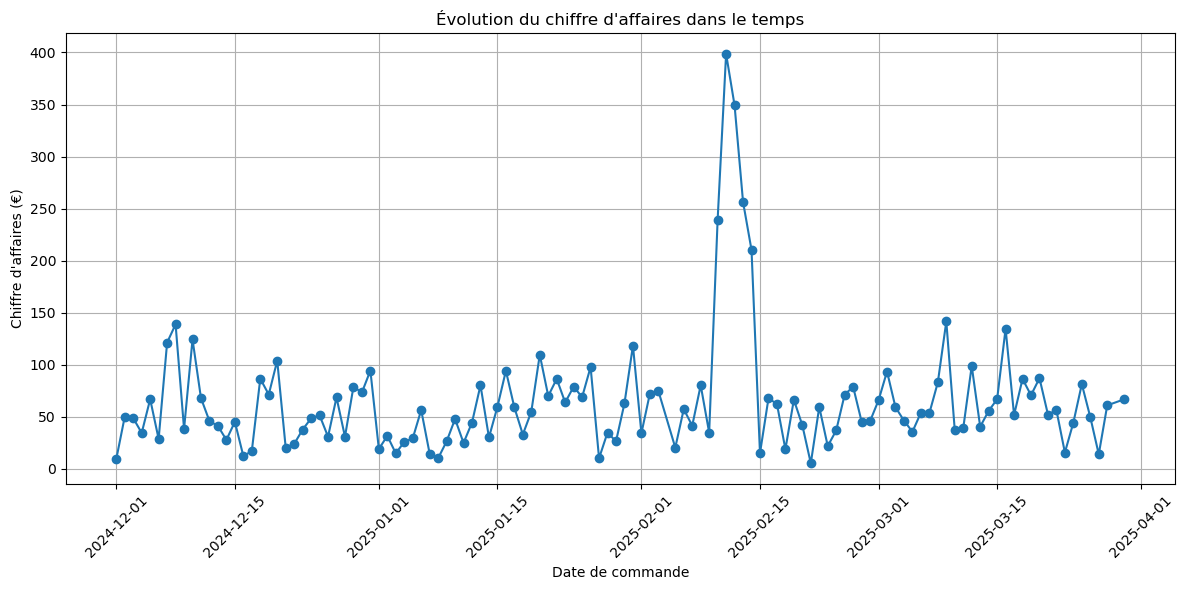

In [194]:
df_ca_par_date = df.groupby("date_commande")["chiffre_affaires"].sum().reset_index() #il faut regrouper par date de commande

# puis tracer le graphique en ligne pour l evolution
plt.figure(figsize=(12, 6))
plt.plot(df_ca_par_date["date_commande"], df_ca_par_date["chiffre_affaires"], marker="o")
plt.title("Évolution du chiffre d'affaires dans le temps")
plt.xlabel("Date de commande")
plt.ylabel("Chiffre d'affaires (€)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


CONCLUSION : le chiffre d'affaire a une tendance globale stable sauf pour la période entre le 8 et le 15 février 2025 où on peut observer une forte hausse inhabituelle dans le temps. 
Il semblerait que la saint valentin ai pu avoir une forte incidence sur le nombre de vente dans cette période.

**6.Afficher précisément les CA par mois et détecter la période avec la plus forte croissance.**

In [198]:
# Crée une colonne avec le mois au format AAAA-MM
df["mois"] = df["date_commande"].dt.to_period("M").astype(str)

# Regroupe et additionne les CA par mois
ca_par_mois = df.groupby("mois")["chiffre_affaires"].sum().reset_index()


In [200]:
df.head()

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients,chiffre_affaires,mois
0,CMD0001,C194,Joseph Torres,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,aucune remarque,5.5,2024-12
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur De Sel,noir,4,6.2,2025-03-19,aucune remarque,24.8,2025-03
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais,16.5,2025-02
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur De Sel,noir,5,6.2,2025-02-13,aucune remarque,31.0,2025-02
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur De Sel,noir,1,6.2,2025-03-03,aucune remarque,6.2,2025-03


In [202]:
df.dtypes #je vais passer la colonne mois en datetime

commande_id                  object
client_id                    object
nom_client                   object
age                           int64
genre                      category
ville                      category
produit_id                   object
nom_produit                  object
type_chocolat              category
quantite                      int64
prix_unitaire               float64
date_commande        datetime64[ns]
remarques_clients            object
chiffre_affaires            float64
mois                         object
dtype: object

In [204]:
ca_par_mois["mois"] = pd.to_datetime(ca_par_mois["mois"].astype(str))

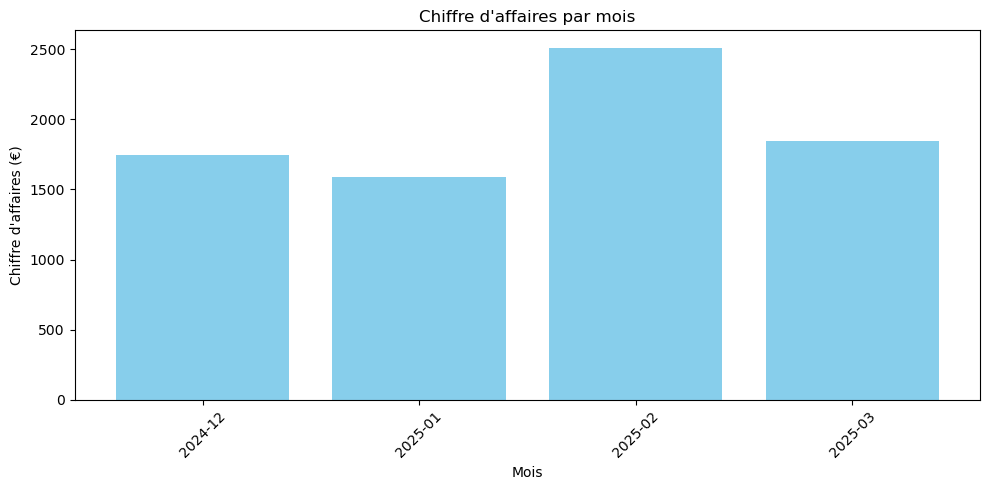

In [206]:
import matplotlib.pyplot as plt #je crée un graphique en barre pour voir l'évolution

plt.figure(figsize=(10, 5))
plt.bar(ca_par_mois["mois"].dt.strftime("%Y-%m"), ca_par_mois["chiffre_affaires"], color="skyblue")
plt.title("Chiffre d'affaires par mois")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CONCLUSION : la période avec la plus forte croissance est celle de février 2025

**7.Identifier les 5 journées ayant généré le plus de chiffre d’affaires et observer si elles correspondent à des dates particulières. Interpréter ces résultats.**

In [210]:
#je regroupe le ciffre d'affaire par jour
ca_par_jour = df.groupby("date_commande")["chiffre_affaires"].sum().reset_index()

In [212]:
top_5_jours = ca_par_jour.sort_values(by="chiffre_affaires", ascending=False).head(5) #j'utilise values pour ranger dans l'ordre decroissant avec ascending les chiffres d'affaires
print(top_5_jours)

   date_commande  chiffre_affaires
71    2025-02-11             398.7
72    2025-02-12             349.2
73    2025-02-13             256.5
70    2025-02-10             239.3
74    2025-02-14             210.4


conclusion: les jours ayant générés le plus de chiffres d'affaires correspondent à la periode pré saint valentin.

**8.Réaliser un graphique en barres représentant le top 5 des produits les plus vendus en quantité.**

In [445]:
#je créé une variable top produit qui regroupe le sproduits par nom et quantité en les rangeant par ordre asecendantet en affichant que les 5 premiers)
top_produits = (
    df.groupby("nom_produit")["quantite"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(top_produits.head())

nom_produit
Chocolux Lait Noisettes       459
Chocolux Noir 80%             422
Chocolux Noir Fleur De Sel    244
Chocolux Blanc Vanille        222
Chocolux Lait Caramel         130
Name: quantite, dtype: int64


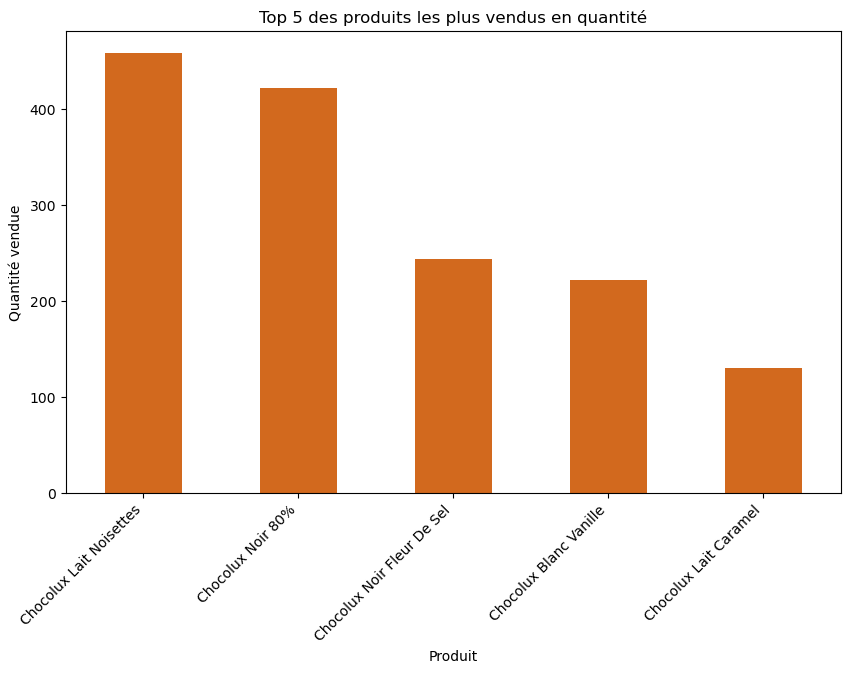

In [449]:
# Graphique en barres
plt.figure(figsize=(10, 6))
top_produits.plot(kind="bar", color="chocolate")

plt.title("Top 5 des produits les plus vendus en quantité")
plt.xlabel("Produit")
plt.ylabel("Quantité vendue")
plt.xticks(rotation=45, ha='right')
plt.show()

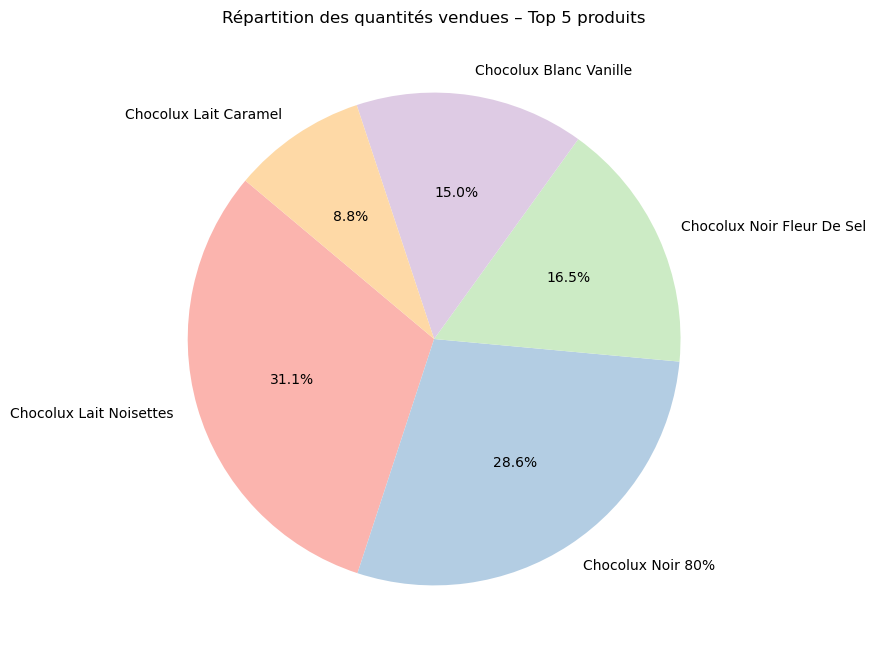

In [218]:
# je choisis un graphique en camembert pour avoir aussi les parts de marché
plt.figure(figsize=(8, 8))
plt.pie(
    top_produits.values,             
    labels=top_produits.index,       
    autopct="%1.1f%%",               
    startangle=140,
    colors=plt.cm.Pastel1.colors     
)
plt.title("Répartition des quantités vendues – Top 5 produits")
plt.show()

CONCLUSION: Les produits qui se vendent le plus sont Chocolux Lait Noisettes, suivi de Chocolux Noir 80%, puis Chocolux Noir Fleur de Sel en troisième position.

Deux produits se démarquent nettement : le Lait Noisettes et le Noir 80%, qui représentent chacun environ 30 % des ventes du Top 5. Leur part de marché est significativement plus élevée que celle des autres produits, ce qui montre un fort attrait des clients pour ces deux références.

**9.Identifier les 3 villes les plus performantes en chiffre d’affaires total.**

In [222]:
#je regroupe le montant du CA par ville, toujours en orde descendant / j'ai ajouté le observed=true car un avertissement ressortait selon la version de python)
top_villes = (
    df.groupby("ville", observed=True)["chiffre_affaires"]
    .sum()
    .sort_values(ascending=False)
)
print(top_villes.head(3))

ville
Paris        2368.6
Lille         919.7
Marseille     891.5
Name: chiffre_affaires, dtype: float64


CONCLUSION: les 3 villes les plus performantes sont Paris, Marseille et Lille en troisième position.

**10.Calculer la dépense moyenne par client et le nombre de clients ayant dépensé plus de 100 €.**

In [237]:
depense_par_client = df.groupby("client_id")["chiffre_affaires"].sum().reset_index() #calcul du CA par client
depense_moyenne = round(depense_par_client["chiffre_affaires"].mean(),2) #calcul de la moyenne de depense par client qui est de 76
depense_moyenne

76.86

conclusion : la dépense moyenne par client est de 76 €

In [241]:
nb_clients_100_plus = (depense_par_client["chiffre_affaires"] > 100).sum() #je calcul le nombre de clients ayant dépensé plus de 100 €
print(f"Nombre de clients ayant dépensé plus de 100 € : {nb_clients_100_plus}")

Nombre de clients ayant dépensé plus de 100 € : 27


## <font color=#A52A2A > **EXERCICE 3 - Création d'une fonction d'analyse stratégique**

**11.Créer une fonction evaluer_performance(ca, nb_clients) qui retourne :**

•Blockbuster si CA ≥ 5000 € et clients ≥ 50

•Niche rentable si CA ≥ 5000 € mais clients < 50

•Produit prometteur si 1000 € ≤ CA < 5000 € et clients ≥ 20

•À retravailler dans tous les autres cas

In [252]:
def evaluer_performance(chiffre_affaires, nb_clients):
    if chiffre_affaires >= 5000 and nb_clients >= 50:
        return "Blockbuster"
    elif chiffre_affaires >= 5000 and nb_clients < 50:
        return "Niche rentable"
    elif 1000 <= chiffre_affaires < 5000 and nb_clients >= 20:
        return "Produit prometteur"
    else:
        return "À retravailler" 
#cette fonctin permet de trier selon les doubles conditions données avec if/and 

**12.Calcule le chiffre d’affaires total et le nombre de clients distincts pour chaque produit, puis regroupe ces deux résultats dans un même tableau appelé produit_stats.**

In [288]:
ca_par_produit = df.groupby("nom_produit")["chiffre_affaires"].sum() #je regroupe les produits par chiffres d'affaires pour avoir le total par categorie
print(f"le chiffre d'affaire total par categorie de produit est : {ca_par_produit}") #j'utilise des phrase dans le print pour donner une petite phrase sur le résultat

le chiffre d'affaire total par categorie de produit est : nom_produit
Chocolux Blanc Vanille         999.0
Chocolux Lait Caramel          650.0
Chocolux Lait Noisettes       2203.2
Chocolux Noir 80%             2321.0
Chocolux Noir Fleur De Sel    1512.8
Name: chiffre_affaires, dtype: float64


In [290]:
clients_par_produit = df.groupby("nom_produit")["nom_client"].count() #je regroupe le nombre de client avec count par categorie de produit
print(f"le nombre de client total par categorie de produit est de : {clients_par_produit}")

le nombre de client total par categorie de produit est de : nom_produit
Chocolux Blanc Vanille         69
Chocolux Lait Caramel          43
Chocolux Lait Noisettes       154
Chocolux Noir 80%             149
Chocolux Noir Fleur De Sel     85
Name: nom_client, dtype: int64


In [330]:
produit_stats = pd.merge(ca_par_produit, clients_par_produit, on="nom_produit") #utilisation de chatgpt pour la mise en tableau .merge 
produit_stats

,nom_produit,ca_total,nb_clients
0,Chocolux Blanc Vanille,999.0,69
1,Chocolux Lait Caramel,650.0,43
2,Chocolux Lait Noisettes,2203.2,154
3,Chocolux Noir 80%,2321.0,149
4,Chocolux Noir Fleur De Sel,1512.8,85


CONCLUSION: les 2 catégories avec le plus de client sont les categories qui vendent le plus .

**13.Appliquer la fonction evaluer_performance sur chaque ligne pour créer la colonne statut_produit et 14-Afficher le(s) produit(s) à retravailler.**

In [338]:
#appply permet d'appliquer notre fonction à toutes les lignes avec axis=1
produit_stats["statut_produit"] = produit_stats.apply(
    lambda row: evaluer_performance(row["ca_total"], row["nb_clients"]),
    axis=1)
produit_stats

,nom_produit,ca_total,nb_clients,statut_produit
0,Chocolux Blanc Vanille,999.0,69,À retravailler
1,Chocolux Lait Caramel,650.0,43,À retravailler
2,Chocolux Lait Noisettes,2203.2,154,Produit prometteur
3,Chocolux Noir 80%,2321.0,149,Produit prometteur
4,Chocolux Noir Fleur De Sel,1512.8,85,Produit prometteur


CONCLUSION: les produits à retravailler sont : le chocolux blanc vanille et le chocolux lait caramel

## <font color=#A52A2A > **EXERCICE 4 - Croisement et insight**

**15.Calcule le chiffre d’affaires total pour chaque client, trouve les clients qui sont dans les 10 % les plus dépensiers, récupère leurs identifiants, puis affiche leur âge, leur genre et leur ville sans doublons.**

In [344]:
# 1. Chiffre d'affaires total par client
ca_clients = df.groupby("client_id")["chiffre_affaires"].sum().reset_index()
ca_clients.rename(columns={"chiffre_affaires": "ca_total"}, inplace=True)

# 2. Seuil des 10 % les plus dépensiers 
seuil = ca_clients["ca_total"].quantile(0.9)

# 3. Filtrer les clients dépensiers
top_clients = ca_clients[ca_clients["ca_total"] >= seuil]

# 4. Récupérer leurs identifiants
ids_top_clients = top_clients["client_id"]

# 5. Infos personnelles sans doublons
infos_top_clients = df[df["client_id"].isin(ids_top_clients)][["client_id", "age", "genre", "ville"]].drop_duplicates()

# 6. Affichage
print("Clients dans les 10 % les plus dépensiers :")
print(infos_top_clients)

Clients dans les 10 % les plus dépensiers :
    client_id  age genre     ville
2        C100   28     F      Lyon
11       C117   50     F     Paris
27       C130   28     F     Paris
28       C100   42     F  Bordeaux
57       C153   58     M     Lille
..        ...  ...   ...       ...
463      C148   58     F     Lille
465      C119   31     M      Lyon
466      C117   44     M  Toulouse
480      C149   27     M     Paris
482      C148   43     M     Paris

[83 rows x 4 columns]


**16.Comparer les volumes de vente selon type_chocolat et genre. (Tableau croisé)**

In [351]:
# Tableau croisé : total des quantités vendues par type de chocolat et genre
tableau_croise = pd.pivot_table(
    df,
    values="quantite",
    index="type_chocolat",
    columns="genre",
    aggfunc="sum",
    fill_value=0,  # Remplace les NaN par 0
    observed=False
)

print("Tableau croisé des ventes par type de chocolat et genre :")
print(tableau_croise)

Tableau croisé des ventes par type de chocolat et genre :
genre            F    M
type_chocolat          
blanc          108  114
lait           245  344
noir           376  290


CONLUSION : Le chocolat noir est le plus populaire chez les femmes avec 376 ventes, il surpasse largement les autres types chez le genre féminin.
Les hommes préfèrent le chocolat au lait, c’est la catégorie la plus vendue chez les hommes (344 ventes), devant le noir (290) et loin devant le blanc.
Le chocolat blanc est globalement le moins vendu que ce soit chez les femmes ou les hommes, il reste à la traîne (environ 100 ventes pour chaque genre).

**17.Crée une fonction nommée tranche_age(age) qui retourne <25, 25-45 ou >45, puis ajoute une colonne tranche_age dans le dataframe. Enfin, affiche le chiffre d’affaires total par ville et par tranche d’âge (tableau croisé).**

In [355]:
def tranche_age(age):
    if age < 25:
        return "<25"
    elif 25 <= age <= 45:
        return "25-45"
    else:
        return ">45"
#je créé la fonction tranche d'âge et ajoute la colonne dans le dataframe

df["tranche_age"] = df["age"].apply(tranche_age)

In [357]:
df.head()

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients,chiffre_affaires,mois,tranche_age
0,CMD0001,C194,Joseph Torres,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,aucune remarque,5.5,2024-12,<25
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur De Sel,noir,4,6.2,2025-03-19,aucune remarque,24.8,2025-03,>45
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais,16.5,2025-02,25-45
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur De Sel,noir,5,6.2,2025-02-13,aucune remarque,31.0,2025-02,>45
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur De Sel,noir,1,6.2,2025-03-03,aucune remarque,6.2,2025-03,>45


In [361]:
#création du tableau croisé dynamique
tableau_ca = pd.pivot_table(
    df,
    values="chiffre_affaires",
    index="ville",
    columns="tranche_age",
    aggfunc="sum",
    fill_value=0,
    observed=False 
)
print("Chiffre d’affaires total par ville et tranche d’âge :")
print(tableau_ca)

Chiffre d’affaires total par ville et tranche d’âge :
tranche_age   25-45    <25    >45
ville                            
Bordeaux      234.3  111.1  224.4
Lille         311.4  256.0  352.3
Lyon          331.9  143.9  348.9
Marseille     353.0  105.2  433.3
Nantes        426.9  104.7  340.2
Nice          243.1  170.8  340.8
Paris        1025.4  437.2  906.0
Toulouse      231.4   32.2  221.6


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

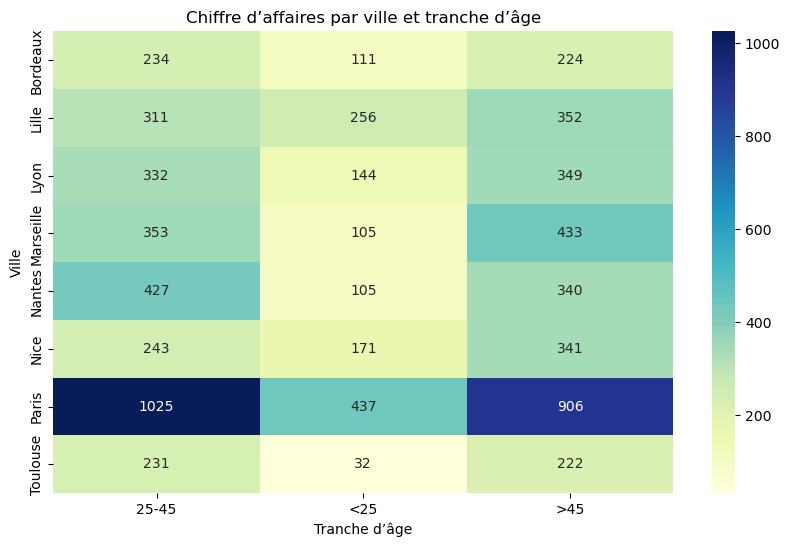

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt

# On garde le tableau croisé créé précédemment
tableau_ca = pd.pivot_table(
    df,
    values="chiffre_affaires",
    index="ville",
    columns="tranche_age",
    aggfunc="sum",
    fill_value=0,
    observed=False
)

# Taille de la figure
plt.figure(figsize=(10, 6))

# Création de la heatmap
sns.heatmap(tableau_ca, annot=True, fmt=".0f", cmap="YlGnBu")

# Titres
plt.title("Chiffre d’affaires par ville et tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Ville")

plt.tight_layout
#chatgpt m a proposé un heatmap pourvisualiser les resultat -je ne connaissais pas mais je trouve cela très parlant visuellement pour ce genre de données

Conclusion: il semble que la ville la plus performante chez les 25-45 ans et les plus de 45 ans soit Paris. elle l est aussi pur la tranche d'âge e 25-45 ans mais est suivi de près par marseille et nantes. 

**18.Calculer l’âge moyen des clients par type de chocolat préféré.**

In [371]:
age_moyen_par_chocolat = df.groupby("type_chocolat", observed=False)["age"].mean().round(1) #je calcul la moyenne demandée et arrondi à 1 chiffre apres la virgule
print("Âge moyen des clients par type de chocolat préféré :")
print(age_moyen_par_chocolat)

Âge moyen des clients par type de chocolat préféré :
type_chocolat
blanc    42.1
lait     41.2
noir     41.8
Name: age, dtype: float64


conclusion: la moyenne d'âge des consommateurs tourne autour de 41-42 ans

**19.Identifier les produits préférés selon les tranches d’âge : <25 ans, 25-45, >45 ans.**

In [376]:
# je regroupe les ventes par produit et tranche d'âge
ventes_par_tranche = df.groupby(["tranche_age", "nom_produit"])["quantite"].sum().reset_index()

# Pour chaque tranche d'âge, on garde le produit avec le max de quantités vendues
produits_pref = ventes_par_tranche.sort_values("quantite", ascending=False).drop_duplicates("tranche_age") #on utilise drop duplicates pour garder que le produit preferé dans chaque tranche 

print("Produits préférés selon les tranches d’âge :")
print(produits_pref[["tranche_age", "nom_produit", "quantite"]])

Produits préférés selon les tranches d’âge :
   tranche_age              nom_produit  quantite
2        25-45  Chocolux Lait Noisettes       189
12         >45  Chocolux Lait Noisettes       181
7          <25  Chocolux Lait Noisettes        89


CONCLUSION: le produit préféré des 25-45 ans, plus de 45 ans et moins de 25 ans est le chocolux noisette avec 189 ventes sur la periode 

## <font color=#A52A2A > **EXERCICE 5 - Analyse qualitative**

**20.Créer une fonction contient_plainte() qui détecte si un texte contient un mot-clé parmi : "mauvais", "fondu", "cassé", "livraison lente". Appliquer cette fonction à la colonne remarques_clients pour créer une nouvelle colonne plainte contenant True ou False.**

In [390]:
#fonction corrigée avec chatgpt car j'étais coincée
def contient_plainte(texte):
    if isinstance(texte, str):
        texte = texte.lower()  # rendre insensible à la casse
        mots_cles = ["mauvais", "fondu", "cassé", "livraison lente"]
        return any(mot in texte for mot in mots_cles)
    return False

df["plainte"] = df["remarques_clients"].apply(contient_plainte) #j applique la fonction à la colonne plainte

In [388]:

df.head()

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients,chiffre_affaires,mois,tranche_age
0,CMD0001,C194,Joseph Torres,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,aucune remarque,5.5,2024-12,<25
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur De Sel,noir,4,6.2,2025-03-19,aucune remarque,24.8,2025-03,>45
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais,16.5,2025-02,25-45
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur De Sel,noir,5,6.2,2025-02-13,aucune remarque,31.0,2025-02,>45
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur De Sel,noir,1,6.2,2025-03-03,aucune remarque,6.2,2025-03,>45


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 500
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   commande_id        500 non-null    object        
 1   client_id          500 non-null    object        
 2   nom_client         500 non-null    object        
 3   age                500 non-null    int64         
 4   genre              500 non-null    category      
 5   ville              500 non-null    category      
 6   produit_id         500 non-null    object        
 7   nom_produit        500 non-null    object        
 8   type_chocolat      500 non-null    category      
 9   quantite           500 non-null    int64         
 10  prix_unitaire      500 non-null    float64       
 11  date_commande      500 non-null    datetime64[ns]
 12  remarques_clients  500 non-null    object        
 13  chiffre_affaires   500 non-null    float64       
 14  mois           

**21.Identifier les produits les plus concernés.**

In [415]:
#size a ete rajouté car dans cette configuration difficle d utiliser count
produits_avec_plaintes = (
    df[df["plainte"] == True]
    .groupby("nom_produit")
    .size()
    .sort_values(ascending=False)
)

print("Produits les plus concernés par des plaintes :")
print(produits_avec_plaintes)

Produits les plus concernés par des plaintes :
nom_produit
Chocolux Noir 80%             31
Chocolux Lait Noisettes        9
Chocolux Noir Fleur De Sel     4
Chocolux Blanc Vanille         3
dtype: int64


conclusion : le produits le plus concerné par les plaintes est le chocolat noir 80% 

**22.Créer un graphique camembert des 4 produits les plus cités.**

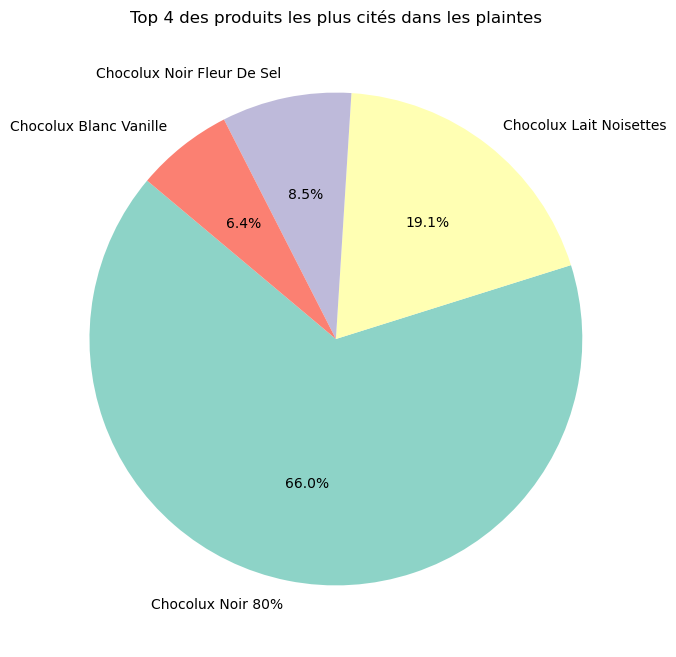

In [427]:
produits_avec_plaintes = (
    df[df["plainte"] == True]
    .groupby("nom_produit")
    .size()
    .sort_values(ascending=False)
    .head(4) ) # je reprend ma formule mais limite les resultat à 4 avec head pour le graphique


# graphique Camembert
plt.figure(figsize=(8, 8))
plt.pie(
    produits_avec_plaintes,
    labels=produits_avec_plaintes.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Set3.colors  # Palette douce et lisible demandée à chatgpt
)

plt.title("Top 4 des produits les plus cités dans les plaintes")
plt.show()

**23.Lister les villes avec le plus de plaintes par rapport aux commandes.**

In [438]:
# Nombre de plaintes par ville 
plaintes_par_ville = df[df["plainte"] == True].groupby("ville",observed=True).size()

# Nombre total de commandes par ville
commandes_par_ville = df.groupby("ville",observed=True).size()

# Taux de plaintes (%) trier par odre décroissant
taux_plainte_par_ville = (plaintes_par_ville / commandes_par_ville * 100).round(1)
taux_plainte_par_ville = taux_plainte_par_ville.sort_values(ascending=False)


print("Taux de plaintes par ville (% des commandes) :")
print(taux_plainte_par_ville)

Taux de plaintes par ville (% des commandes) :
ville
Bordeaux     19.4
Lille        18.0
Paris        10.7
Lyon          9.3
Marseille     7.3
Nice          4.2
Nantes        3.4
Toulouse      NaN
dtype: float64


CONCLUSION: les villes avec le plus de plaintes sont Bordeaux et Lille.

## <font color=#A52A2A > **QUESTION FINALE - RECOMMANDATIONS STRATEGIQUES**

📝 **Recommandations stratégiques à destination de la direction de Chocolux**
1. 🏆 Produits à valoriser
Les deux produits phares sont Chocolux Lait Noisettes et Chocolux Noir 80%, représentant chacun environ 30 % des ventes du Top 5. Leur succès est constant auprès de toutes les tranches d’âge, et particulièrement chez les 25–45 ans.
Action recommandée :

Mettre en avant ces deux produits dans les campagnes marketing (pubs, packaging, promotions)

Décliner ces recettes en éditions spéciales (ex : version « Saint-Valentin » ou « Noël »)

Fidéliser les acheteurs de ces produits via des offres exclusives

2. 🛠️ **Produits à retravailler ou repositionner**
Les ventes des produits Chocolux Blanc Vanille et Lait Caramel sont nettement en retrait. De plus, le chocolat blanc est globalement moins populaire, tous genres confondus.
Action recommandée :

Revoir la recette ou le positionnement (ex. : passer à une version premium ou gourmande)

Mieux cibler le public (ex. : enfants, jeunes adultes) ou tester en édition limitée

Supprimer ou reformuler les produits peu vendus pour réduire les coûts

3. 🎯 **Villes et tranches d’âge à cibler en priorité**
Paris, Marseille et Lille sont les villes les plus performantes en chiffre d’affaires.
La tranche d’âge 25-45 ans est la plus active en achat, avec un panier moyen de 76 €.
Action recommandée :

Concentrer les efforts commerciaux (événements, publicité locale) dans ces villes

Adapter les communications à cette tranche d’âge (style, canaux de diffusion, valeurs)

4. 💎 **Fidéliser les clients à fort potentiel**
27 clients ont dépensé plus de 100 €, ce qui en fait une cible très précieuse.
Action recommandée :

Lancer un programme fidélité ou un club premium avec avantages

Offrir des codes promo, échantillons ou accès anticipé à certaines collections

Mettre en place un suivi personnalisé ou une newsletter VIP

5. ❗ **Réduction des plaintes et amélioration de la satisfaction**
Le produit Chocolux Noir 80% est celui qui génère le plus de plaintes (31 sur 47 signalées), suivi du Lait Noisettes. Les remarques concernent principalement des problèmes de produits fondus, cassés ou de livraison lente.
Les villes de Bordeaux et Lille sont les plus concernées.
Action recommandée :

Améliorer l’emballage pour mieux protéger les produits fragiles

Revoir les partenaires logistiques ou les délais de livraison dans certaines régions

Ajouter un formulaire de feedback pour réagir plus vite aux problèmes

📅 **Autre point notable**
Une hausse significative du chiffre d'affaires a été observée entre le 8 et le 15 février 2025, probablement liée à la Saint-Valentin.
Action recommandée :

Capitaliser sur cet événement chaque année avec une offre spéciale

Mettre en avant les produits best-sellers sous forme de coffrets thématiques

💡 **Conclusion générale** : Chocolux dispose d'une base solide avec des produits leaders et un public bien identifié. En capitalisant sur ses best-sellers, en améliorant la qualité de livraison et en fidélisant ses clients les plus rentables, l’entreprise peut renforcer sa croissance tout en améliorant l’expérience client.

